In [1]:
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import lxml
import pandas as pd
from lxml import objectify, etree, html
import json
from pandas import read_csv
from itertools import combinations
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
from gensim import corpora, models

c:\users\ksgo0816\appdata\local\programs\python\python36-32\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
categories = ["health", "culture", "style", "education"]
categoryId = {"health" : 0, "culture" : 1, "style" : 2, "education" : 3}

In [3]:
f = open('Texts.txt', 'r')
titles=[]
inner_texts=[]
all_texts=f.read().splitlines()
i=0
indexes=[]
flag=0
text=""
for line in all_texts:
    if line!=categories[0] and line!=categories[1] and line!=categories[2] and line!=categories[3]:
        if i==0:
            titles.append(line)
        if flag==1:
            titles.append(line)
            flag=0
        else:
            if flag==0:
                text+=line
        if line=="":
            flag=1
            inner_texts.append(text)
            text=""
        i+=1
    else:
        indexes.append(len(titles))
inner_texts.append(text)

In [4]:
texts = pd.DataFrame(columns=["CategoryName", "TextId", "Title", "Text"])
i = 0
ind_i=1
for ind in range(len(titles)):
    if ind_i!=4:
        if i<indexes[ind_i]:
            pass
        else:
            ind_i+=1
    texts = texts.append({"CategoryName" : categories[ind_i-1], "TextId" : i, "Title" : titles[i], "Text" :inner_texts[i]}, ignore_index=True)
    i += 1
texts

CategoryName TextId                                              Title  \
0         health      0  Минздрав: В стране открывается по несколько со...   
1         health      1   Израильская компания провела успешные испытан...   
2         health      2  Пик смертности от внешних причин приходится  н...   
3         health      3          Олимпийские игры на фоне кишечного гриппа   
4         health      4  На севере Турции зарегистрирована вспышка сиби...   
5         health      5                               Если сустав заржавел   
6         health      6  К чемпионату мира по футболу московских медико...   
7         health      7     Почему томограф не всегда может заменить врача   
8         health      8                  Диабетики скоро забудут про уколы   
9         health      9      Молекулярные диетологи вместо семейных врачей   
10        health     10  Интуитивное питание против праздничных килогра...   
11        health     11    СПИД стал угрозой не только для групп риска (3)   
12        health     12  Зафиксирован скачок числа преступлений в отнош...   
13        health     13  Проведены операции  по имплантации  бионическо...   
14        health     14       Гомеопатию официально признали лженаукой (1)   
15        health     15              Произошла смена эпох в Онкоцентре (4)   
16        health     16                           Мифы о щитовидной железе   
17        health     17     Маятниковая миграция как болезнетворный фактор   
18        health     18  Путин считает, что система отечественного здра...   
19        health     19                      Молочница – инфекция коварная   
20        health     20                 Коварные лабиринты внутреннего уха   
21        health     21  Медведев подписал программу госгарантий оказан...   
22        health     22                   Прежде всего – тотальная гигиена   
23        health     23                  Дефибриллятор шаговой доступности   
24        health     24           Вакцины от мракобесия пока не существует   
25        health     25                      Вирус, который всегда с тобой   
26        health     26                             Уйти из жизни достойно   
27        health     27  Игорь Ермаков: «Живи осознанно на благо всех л...   
28        health     28                  Мухоморы и другие антидепрессанты   
29        health     29                   Беспощадный натиск тихой болезни   
..           ...    ...                                                ...   
626    education    626      Рынок онлайн-образования в России резко вырос   
627    education    627   Политики делают пугающий прогноз для высших школ   
628    education    628  Вузы бывают магнитами и транзитами, а также эк...   
629    education    629              Взрослое население призывают учиться    
630    education    630                          Чего боятся дети в городе   
631    education    631  Артисты, священники и омбудсмены предупредили ...   
632    education    632                 На главный экзамен денег не жалеют   
633    education    633                                  Звание или знание   
634    education    634  Рособрнадзор  запретил прием студентов в Толья...   
635    education    635                         Вузы потянуло в творчество   
636    education    636                      Депутаты изучили детский труд   
637    education    637      Куда пойти учиться, чтобы заработать миллионы   
638    education    638       Родители не должны определять политику школы   
639    education    639   Платье на выпускной вечер как повод для скандала   
640    education    640               Молодежь на селе тоже хочет креатива   
641    education    641  Языковая глобализация и "принуждение к английс...   
642    education    642  Китай пробивается в лидеры рейтингов университ...   
643    education    643      Школа – это не фабрика по производству знаний   
644    education    644  МГУ занял первое место в VIII Национальном рей...   
645    education    645   

In [5]:
f = open('Словарь н.txt', 'r')
text=f.read().split("\n")
words=[]
for item in text:
    if item!="":
        words.append(item)
words=np.asarray(words, dtype=object)
words

array(['минздрав', 'в', 'страна', ..., 'штернберг', 'гаиш',
       'любознательность'], dtype=object)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#LSA

X = texts.Text

vector = CountVectorizer()
tfidf = TfidfTransformer()

x_count = vector.fit_transform(X)
x = tfidf.fit_transform(x_count)
x.toarray().shape

(656, 78896)

In [7]:
N_TOPICS = 4
keys = list(vector.vocabulary_.keys())
values = list(vector.vocabulary_.values())

_ind = np.argsort(values)
words_sorted = np.asarray(keys)[_ind]

print(len(keys), len(values), len(words_sorted))

78896 78896 78896


In [8]:
svd = TruncatedSVD(n_components=N_TOPICS, n_iter=10).fit(x_count)

['все' 'из' 'но' 'это' 'то' 'как' 'по' 'что' 'не' 'на']
[0.13021656 0.1543314  0.16354863 0.16429592 0.17396848 0.18164625
 0.19705636 0.34273193 0.44239555 0.48218185]

['как' 'она' 'все' 'меня' 'если' 'он' 'это' 'то' 'что' 'не']
[0.06769486 0.07762528 0.07915429 0.08091315 0.08853208 0.10047625
 0.10648455 0.19022489 0.30653641 0.38526171]

['от' 'петербургской' 'туминаса' 'партии' 'постановке' 'как' 'театре'
 'театра' 'спектакль' 'сопрано']
[0.09513179 0.10622581 0.10627602 0.10814265 0.10825396 0.12490213
 0.13915208 0.16023019 0.17081205 0.1869759 ]

['замза' 'конферансье' 'кафки' 'происходит' 'но' 'из' 'что' 'грегор' 'он'
 'его']
[0.09199211 0.09210784 0.09304817 0.0952848  0.10194871 0.12804241
 0.20614794 0.21465126 0.26641885 0.39107109]



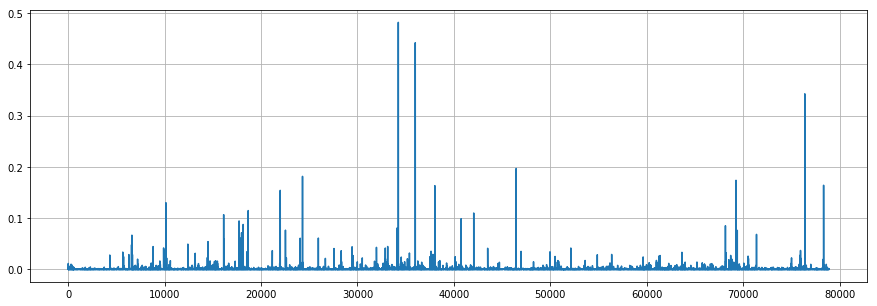

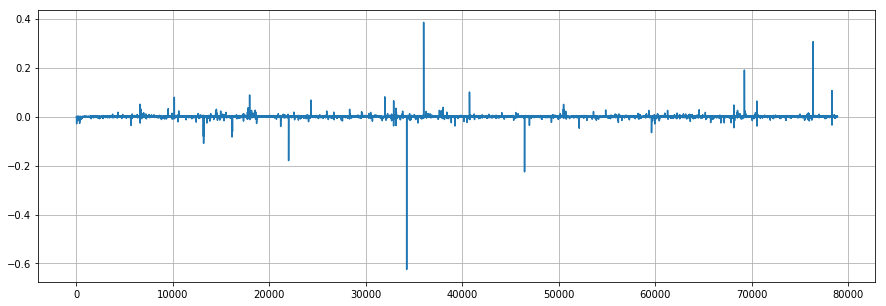

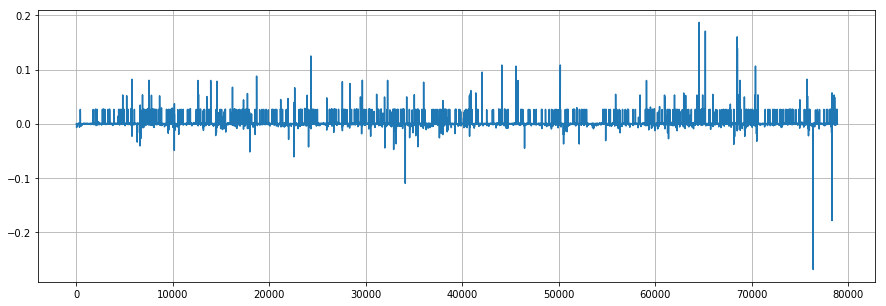

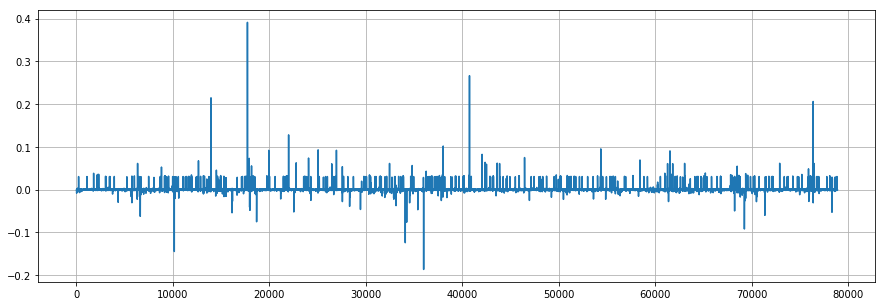

In [9]:
stub = [0] * N_TOPICS
for i in range(N_TOPICS):
    ind = np.argsort(svd.components_[i])[-10:]
    print(words_sorted[ind])
    print(np.sort(svd.components_[i])[-10:])
    print()
    
    tmp = stub.copy()
    tmp[i] = 1
    plt.figure(figsize=(15, 5))
    plt.plot(svd.components_[i])
    plt.grid(True)

In [10]:
#LDA
from pymystem3 import Mystem
import re
m = Mystem()
lemmatize_texts=[]
for text_i in texts.Text:
    text=re.sub(r'[^\w\s]','', text_i)
    text=re.sub('\d','', text)
    text=re.sub(r'[\n\r\t]',' ', text)
    lemmatize_texts.append(m.lemmatize(text))

In [11]:
clear_texts=[]
for text in lemmatize_texts:
    tmp=[]
    for t in text:
        if not t.startswith(' ') and not t.startswith('\n'):
            tmp.append(t)
    clear_texts.append(tmp)

In [12]:
corpus = []
for text in clear_texts:
    tokens = [t for t in text if len(t) >= 3]
    corpus.append(tokens)

In [13]:
dictionary = corpora.Dictionary(corpus)

In [14]:
X_bow = [dictionary.doc2bow(text) for text in corpus]

In [15]:
import gensim
lda_gensim = gensim.models.ldamodel.LdaModel(X_bow, num_topics=N_TOPICS, id2word=dictionary, iterations=10)

In [16]:
lda_gensim.print_topics()

[(0,
  '0.015*"что" + 0.011*"быть" + 0.008*"который" + 0.007*"год" + 0.007*"этот" + 0.006*"они" + 0.005*"как" + 0.005*"это" + 0.005*"свой" + 0.005*"человек"'),
 (1,
  '0.013*"что" + 0.009*"быть" + 0.008*"этот" + 0.007*"который" + 0.007*"это" + 0.007*"как" + 0.006*"год" + 0.006*"они" + 0.004*"для" + 0.004*"свой"'),
 (2,
  '0.013*"быть" + 0.012*"что" + 0.009*"как" + 0.008*"это" + 0.006*"они" + 0.006*"который" + 0.005*"этот" + 0.005*"для" + 0.005*"год" + 0.005*"весь"'),
 (3,
  '0.011*"быть" + 0.011*"что" + 0.007*"который" + 0.007*"это" + 0.006*"год" + 0.006*"как" + 0.006*"этот" + 0.005*"она" + 0.005*"они" + 0.004*"весь"')]

In [17]:
#sclearn
lda_sklearn = LatentDirichletAllocation(n_components=N_TOPICS, max_iter=10, batch_size=10, evaluate_every=1, verbose=1, 
                                        n_jobs=4, learning_method='batch').fit(x)

iteration: 1 of max_iter: 10, perplexity: 469916.5191
iteration: 2 of max_iter: 10, perplexity: 425033.1228
iteration: 3 of max_iter: 10, perplexity: 411379.8395
iteration: 4 of max_iter: 10, perplexity: 397814.9705
iteration: 5 of max_iter: 10, perplexity: 354518.9070
iteration: 6 of max_iter: 10, perplexity: 299078.3826
iteration: 7 of max_iter: 10, perplexity: 276709.0260
iteration: 8 of max_iter: 10, perplexity: 271601.5689
iteration: 9 of max_iter: 10, perplexity: 270413.5715
iteration: 10 of max_iter: 10, perplexity: 270281.3979


In [18]:
lda_sklearn.components_.shape

(4, 78896)

In [19]:
stub = [0] * N_TOPICS

for i in range(N_TOPICS):
    ind = np.argsort(lda_sklearn.components_[i])[-10:]
    print(words_sorted[ind])
    print(np.sort(svd.components_[i])[-10:])
    print()

['пищи' 'занимают' 'мороженое' 'зависимость' 'шоколад' 'пицца'
 'гамбургеры' 'вызывающей' 'com' 'mignews']
[0.13021656 0.1543314  0.16354863 0.16429592 0.17396848 0.18164625
 0.19705636 0.34273193 0.44239555 0.48218185]

['туминаса' 'конферансье' 'кафки' 'замза' 'его' 'спектакль' 'на' 'не'
 'сопрано' 'грегор']
[0.06769486 0.07762528 0.07915429 0.08091315 0.08853208 0.10047625
 0.10648455 0.19022489 0.30653641 0.38526171]

['edtech' 'иа' 'по' 'пресс' 'интерфакса' 'службы' 'новости' 'риа' 'тасс'
 'информации']
[0.09513179 0.10622581 0.10627602 0.10814265 0.10825396 0.12490213
 0.13915208 0.16023019 0.17081205 0.1869759 ]

['для' 'но' 'то' 'это' 'из' 'как' 'по' 'что' 'не' 'на']
[0.09199211 0.09210784 0.09304817 0.0952848  0.10194871 0.12804241
 0.20614794 0.21465126 0.26641885 0.39107109]

